In [65]:
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib
%matplotlib inline

In [2]:
VERBOSE = 0
cleaned_data_location = "../data/cleaned_data/gapminder_cleaned.csv"
try:
    df = pd.read_csv(cleaned_data_location)
    if VERBOSE == 1:
        print(df.head())
except FileNotFoundError:
    print("whoops! this isn't the file you're looking for. ", cleaned_data_location)

,year,pop,lifeexp,gdppercap,country,continent
0,1952,8425333,28.801,779.445314,afghanistan,asia
1,1957,9240934,30.332,820.853030,afghanistan,asia
2,1962,10267083,31.997,853.100710,afghanistan,asia
3,1967,11537966,34.020,836.197138,afghanistan,asia
4,1972,13079460,36.088,739.981106,afghanistan,asia


In [4]:
df.shape

(1704, 6)

In [10]:
years = df.year.unique()
years
assert min(years) == 1952
assert max(years) == 2007

# What is the mean life expectancy in Asia through time?

In [17]:
#start with 1952
#narrow down our data to Asia
mask_asia = df['continent']=='asia'
df_asia = df[mask_asia]

mask_1952 = df_asia['year'] == 1952
df_1952 = df_asia[mask_1952]

value = np.mean(df_1952.lifeexp)
print(value)


46.314393939393945


In [26]:
mask_asia = df['continent']=='asia'
df_asia = df[mask_asia]

years = df_asia.year.unique()
print(years)

continents = df.continent.unique()
print(continents)

[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]
['asia' 'europe' 'africa' 'americas' 'oceania']


In [32]:
VERBOSE = 0
last_value = 0
summary = []

for continent in continents:
    mask_continent = df['continent']==continent
    df_continent = df[mask_continent]
    df_cont_years = df_continent.year.unique()
    for year in years:
        if VERBOSE:
            print(year)
        year_mask = df_continent['year'] == year
        df_year = df_continent[year_mask]
        value = np.mean(df_year.lifeexp)
        assert value != last_value
        last_value = value
        summary.append((continent, year, value))
        if VERBOSE:
            print(summary)
summary = pd.DataFrame(summary, columns = ['Continent', 'Year', 'LifeExp'])
summary.groupby('Continent').mean()


,Year,LifeExp
Continent,,
africa,1979.5,48.865330
americas,1979.5,64.658737
asia,1979.5,60.064903
europe,1979.5,71.903686
oceania,1979.5,74.326208


In [33]:
def add_two(input_num):
    return input_num + 2

In [34]:
add_two(7)

9

In [36]:
#write a function to calculate mean value per year for a continent for a given category

In [61]:
def calculate_statistic_over_time(data, category, continent, func):
    """Calculate values of a statistic over time
    
    Args:
        data: a pandas data frame that includes a column heading 'continent' and 'year'
        category: a string that is one of the column headings in data
        continent: a string that is one of the values in the continent column
        func: a function that can operate on a list of numbers (eg np.mean)
    
    Returns:
        a pandas dataframe with headings of continent, year, category
    """
    #create a mask to select your continent
    # check inputs
    assert 'continent' in data.columns.values
    assert continent in data.continent.unique()
    mask_continent = data['continent'] == continent #data frame must have a continent column
    data_continent = data[mask_continent]
    #loop through years and calc mean
    years = data_continent.year.unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_continent_year = data_continent[mask_year]
        value = func(data_continent_year[category])
        summary.append((continent, year, value))
    summary = pd.DataFrame(summary, columns = ["Continent", "Year", category])
    return summary

In [62]:
output_summary = calculate_statistic_over_time(df, "pop", "europe", np.mean)
output_summary

,Continent,Year,pop
0,europe,1952,1.393736e+07
1,europe,1957,1.459635e+07
2,europe,1962,1.534517e+07
3,europe,1967,1.603930e+07
4,europe,1972,1.668784e+07
5,europe,1977,1.723882e+07
6,europe,1982,1.770890e+07
7,europe,1987,1.810314e+07
8,europe,1992,1.860476e+07
9,europe,1997,1.896480e+07


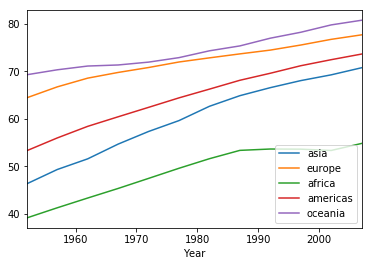

In [66]:
#use this function to plot life expectancy over time across continents
continents = df['continent'].unique()
fig, ax = plt.subplots()
for continent in continents:
    output = calculate_statistic_over_time(df, "lifeexp", continent, np.mean)
    output.plot.line('Year', 'lifeexp', ax = ax, label = continent)